In [50]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import NearestNeighbors
from collections import Counter
import numpy as np

In [ ]:
df = pd.read_csv("../Data/Classi_Data/flight_dep_classi.csv")
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45155 entries, 0 to 45154
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MONTH                      45155 non-null  int64  
 1   DAY_OF_MONTH_sin           45155 non-null  float64
 2   DAY_OF_MONTH_cos           45155 non-null  float64
 3   DAY_OF_WEEK_sin            45155 non-null  float64
 4   DAY_OF_WEEK_cos            45155 non-null  float64
 5   CRS_ELAPSED_TIME           45155 non-null  float64
 6   DISTANCE                   45155 non-null  float64
 7   HourlyDewPointTemperature  45155 non-null  float64
 8   HourlyDryBulbTemperature   45155 non-null  float64
 9   HourlyRelativeHumidity     45155 non-null  float64
 10  HourlyVisibility           45155 non-null  float64
 11  HourlyWindSpeed            45155 non-null  float64
 12  CRS_DEP_TIME_sin           45155 non-null  float64
 13  CRS_DEP_TIME_cos           45155 non-null  flo

,MONTH,DAY_OF_MONTH_sin,DAY_OF_MONTH_cos,DAY_OF_WEEK_sin,DAY_OF_WEEK_cos,CRS_ELAPSED_TIME,DISTANCE,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyRelativeHumidity,HourlyVisibility,HourlyWindSpeed,CRS_DEP_TIME_sin,CRS_DEP_TIME_cos,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_DEL15
count,45155.000000,45155.000000,45155.000000,4.515500e+04,45155.000000,45155.000000,45155.000000,45155.000000,45155.000000,45155.000000,45155.000000,45155.000000,45155.000000,45155.000000,45155.000000,45155.000000,45155.000000,45155.000000
mean,5.046728,-0.013925,-0.016607,4.662193e-03,-0.003480,183.310597,1175.492703,42.800066,59.471664,57.692747,9.810818,8.246529,-0.063401,-0.300808,4.342642,3.611007,45.445288,0.117418
std,0.808438,0.715961,0.697820,7.068339e-01,0.707371,84.569100,732.185970,6.723190,9.337098,18.536586,0.983229,3.873726,0.717809,0.624712,3.858876,0.992802,25.759279,0.321921
min,4.000000,-0.998717,-0.994869,-9.749279e-01,-0.900969,49.000000,93.000000,5.000000,30.000000,11.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,-0.724793,-0.758758,-7.818315e-01,-0.900969,125.000000,679.000000,39.000000,53.000000,44.000000,10.000000,6.000000,-0.793353,-0.866025,1.000000,4.000000,22.000000,0.000000
50%,5.000000,-0.101168,-0.050649,-2.449294e-16,-0.222521,166.000000,978.000000,43.000000,58.000000,59.000000,10.000000,8.000000,-0.143493,-0.500000,3.000000,4.000000,45.000000,0.000000
75%,6.000000,0.724793,0.688967,7.818315e-01,0.623490,244.000000,1721.000000,48.000000,65.000000,71.000000,10.000000,10.000000,0.669131,0.086286,9.000000,4.000000,71.000000,0.000000
max,6.000000,0.998717,1.000000,9.749279e-01,1.000000,411.000000,2724.000000,60.000000,102.000000,100.000000,10.000000,30.000000,1.000000,0.999986,11.000000,4.000000,85.000000,1.000000


In [52]:
X = df.drop(columns=["DEP_DEL15"])  
y = df["DEP_DEL15"]  

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [54]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

In [56]:
model = KNeighborsClassifier(n_neighbors=3, weights='distance')
model.fit(X_train_smote, y_train_smote)

,n_neighbors,3
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [57]:
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

print(" KNN Classifier Results")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC-AUC : {roc_auc_score(y_test, y_prob):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

 KNN Classifier Results
Accuracy: 0.7170
ROC-AUC : 0.5726

Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.77      0.83      7971
         1.0       0.16      0.33      0.22      1060

    accuracy                           0.72      9031
   macro avg       0.53      0.55      0.52      9031
weighted avg       0.81      0.72      0.76      9031



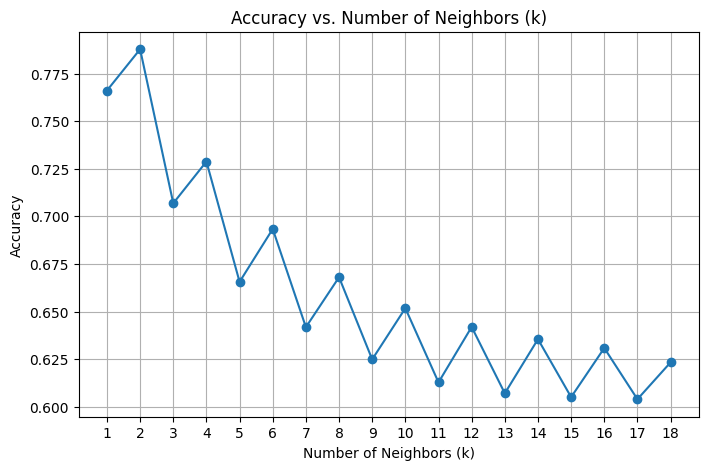

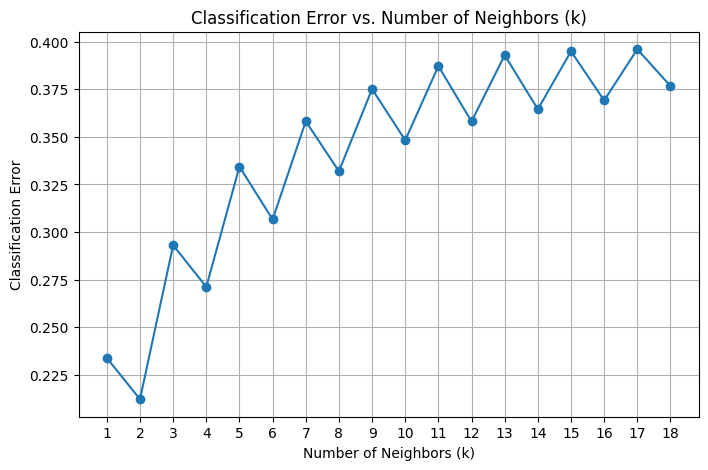

In [58]:
k_values = range(1, 19)
accuracies = []
errors = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_smote, y_train_smote)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    errors.append(1 - acc)

plt.figure(figsize=(8,5))
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)

plt.show()

plt.figure(figsize=(8,5))
plt.plot(k_values, errors, marker='o')
plt.title('Classification Error vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Classification Error')
plt.xticks(k_values)
plt.grid(True)

plt.show()

In [59]:
k = 2  
nn = NearestNeighbors(n_neighbors=k)
nn.fit(X_train_smote) 

distances, indices = nn.kneighbors(X_test_scaled)  

tie_points = 0
total_points = len(X_test_scaled)

for i, neighbors_idx in enumerate(indices):
    neighbor_labels = np.array(y_train_smote)[neighbors_idx]
    label_counts = Counter(neighbor_labels)
    most_common = label_counts.most_common()

    max_count = most_common[0][1]
    tied_classes = [label for label, count in most_common if count == max_count]

    if len(tied_classes) > 1:
        tie_points += 1
        print(f"Point {i} has tie between classes {tied_classes} with {max_count} votes each.")

print(f"Total points with tie: {tie_points} out of {total_points}")
print(f"Percentage of tie points: {tie_points/total_points*100:.2f}%")

Point 2 has tie between classes [np.float64(1.0), np.float64(0.0)] with 1 votes each.
Point 7 has tie between classes [np.float64(1.0), np.float64(0.0)] with 1 votes each.
Point 28 has tie between classes [np.float64(0.0), np.float64(1.0)] with 1 votes each.
Point 35 has tie between classes [np.float64(0.0), np.float64(1.0)] with 1 votes each.
Point 43 has tie between classes [np.float64(1.0), np.float64(0.0)] with 1 votes each.
Point 50 has tie between classes [np.float64(0.0), np.float64(1.0)] with 1 votes each.
Point 51 has tie between classes [np.float64(0.0), np.float64(1.0)] with 1 votes each.
Point 58 has tie between classes [np.float64(0.0), np.float64(1.0)] with 1 votes each.
Point 65 has tie between classes [np.float64(0.0), np.float64(1.0)] with 1 votes each.
Point 69 has tie between classes [np.float64(0.0), np.float64(1.0)] with 1 votes each.
Point 71 has tie between classes [np.float64(0.0), np.float64(1.0)] with 1 votes each.
Point 73 has tie between classes [np.float64(